In [1]:
print('hi')


hi


In [14]:
import tensorflow as tf

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

# Test TensorFlow with a simple computation
a = tf.constant(5)
b = tf.constant(3)
c = a + b

# Print the result
print("Result of TensorFlow computation (5 + 3):", c.numpy())


TensorFlow version: 2.17.0
Result of TensorFlow computation (5 + 3): 8


In [17]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [24]:
(X_train,Y_train) ,(X_test,Y_test)=keras.datasets.mnist.load_data()

In [38]:
X_train=X_train/255
X_test=X_test/255

In [26]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

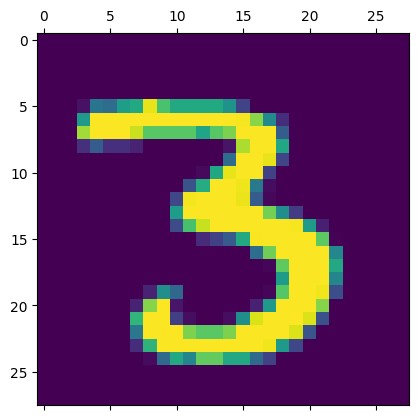

In [28]:
plt.matshow(X_train[12])

In [29]:
Y_train[12]

3

In [30]:
X_train.shape

(60000, 28, 28)

In [39]:
x_train_flat=X_train.reshape(len(X_train),28*28)
x_test_flat=X_test.reshape(len(X_test),28*28)

In [33]:
x_train_flat.size

47040000

In [40]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(x_train_flat,Y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9132 - loss: 0.3129
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9205 - loss: 0.2899
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9241 - loss: 0.2714
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9250 - loss: 0.2688
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9277 - loss: 0.2615


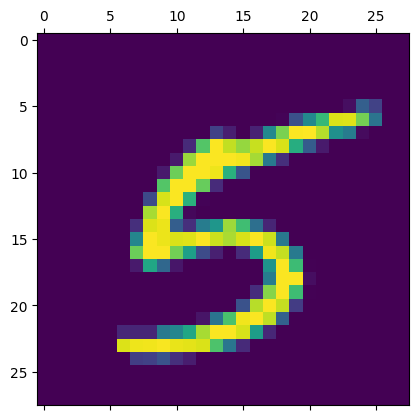

In [53]:
plt.matshow(X_test[52])

In [49]:
y_predicted=model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [50]:
y_predicted[52]

array([2.1661879e-02, 2.3275923e-07, 7.3134378e-02, 9.5107675e-01,
       1.7330970e-03, 1.1713872e-01, 1.3340990e-06, 9.9983281e-01,
       9.1938622e-02, 6.0153580e-01], dtype=float32)

In [54]:
np.argmax(y_predicted[52])
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [59]:
data=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

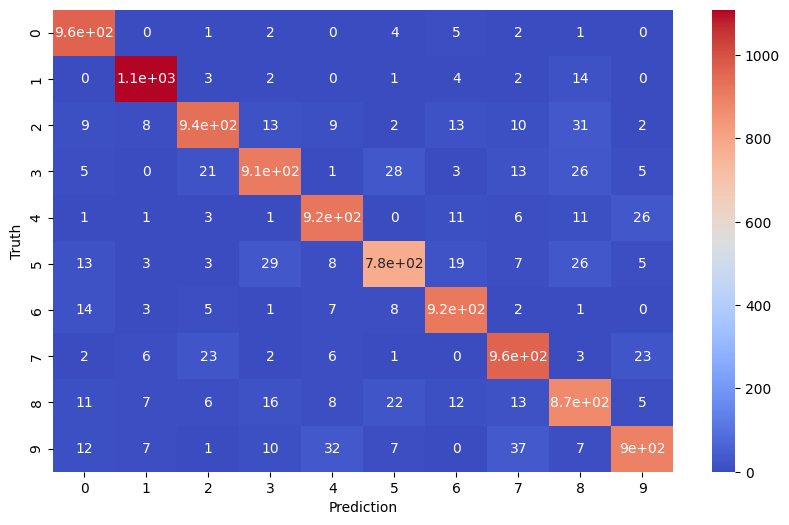

In [66]:
data=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(data, annot=True, cmap='coolwarm')

# Set axis labels
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [67]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
        keras.layers.Dense(10, activation='sigmoid'),

])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


C:\Users\asus\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.fit(x_train_flat,Y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8772 - loss: 0.4426
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9617 - loss: 0.1293
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9751 - loss: 0.0854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9814 - loss: 0.0631
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0492


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

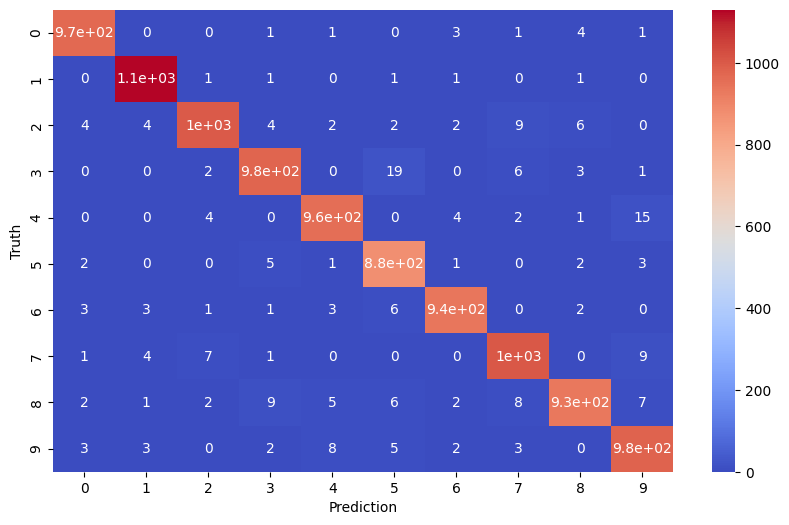

In [69]:
y_predicted=model.predict(x_test_flat)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


data=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(data, annot=True, cmap='coolwarm')

# Set axis labels
plt.xlabel('Prediction')
plt.ylabel('Truth')